# Question 3: Build models using CBFV

**3.1 Regression**

For this problem you will be loading the `matbench_steels` dataset from the matbench benchmark datasets. (https://matbench.materialsproject.org/) To load this datasets, you will need the `matminer` package which can be installed via `pip install matminer` within your MatInformatics python virtual environment. 

a) Load the dataset and explore the distribution of yield strengths with a histogram or violin plot.

In [21]:
from matminer.datasets import load_dataset
import pandas as pd

# Load the matbench_steels dataset
dataset = load_dataset("matbench_steels")
df = pd.DataFrame(dataset)
# Display the dataset
print(df.head())  # Display the first few rows of the dataset
print(df.shape)  # Display the number of rows and columns in the dataset
print(df.info())  # Display information about the dataset, including data types and missing values
print(df.describe())  # Display summary statistics of the dataset



                                         composition  yield strength
0  Fe0.620C0.000953Mn0.000521Si0.00102Cr0.000110N...          2411.5
1  Fe0.623C0.00854Mn0.000104Si0.000203Cr0.147Ni0....          1123.1
2  Fe0.625Mn0.000102Si0.000200Cr0.0936Ni0.129Mo0....          1736.3
3  Fe0.634C0.000478Mn0.000523Si0.00102Cr0.000111N...          2487.3
4  Fe0.636C0.000474Mn0.000518Si0.00101Cr0.000109N...          2249.6
(312, 2)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 312 entries, 0 to 311
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   composition     312 non-null    object 
 1   yield strength  312 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.3+ KB
None
       yield strength
count      312.000000
mean      1420.998397
std        301.894169
min       1005.900000
25%       1219.475000
50%       1344.200000
75%       1576.075000
max       2510.300000


b) Featurize the data using the `CBFV` package. Create three featurized versions of the data: one with the `mat2vec` feature set, one with `magpie`, and one with `oliynyk`. 


In [13]:
from CBFV import composition

df.rename(columns={'composition': 'formula', 'yield strength': 'target'}, inplace=True)
X_mat2vec, y_mat2vec, formulae, skipped = composition.generate_features(df, elem_prop='mat2vec')
X_magpie, y_magpie, formulae, skipped = composition.generate_features(df, elem_prop='magpie')
X_oliynyk, y_oliynyk, formulae, skipped = composition.generate_features(df, elem_prop='oliynyk')

Processing Input Data: 100%|██████████| 312/312 [00:00<00:00, 9041.63it/s]


	Featurizing Compositions...


Assigning Features...: 100%|██████████| 312/312 [00:00<00:00, 3430.00it/s]


	Creating Pandas Objects...


Processing Input Data: 100%|██████████| 312/312 [00:00<00:00, 11210.68it/s]


	Featurizing Compositions...


Assigning Features...: 100%|██████████| 312/312 [00:00<00:00, 7348.80it/s]


	Creating Pandas Objects...


Processing Input Data: 100%|██████████| 312/312 [00:00<00:00, 9939.71it/s]


	Featurizing Compositions...


Assigning Features...: 100%|██████████| 312/312 [00:00<00:00, 5493.41it/s]


	Creating Pandas Objects...


c) Split the dataset into training and testing sets (80% training, 20% testing).



In [14]:
from sklearn.model_selection import train_test_split

# Split X_mat2vec into training and test sets
X_mat2vec_train, X_mat2vec_test, y_mat2vec_train, y_mat2vec_test = train_test_split(X_mat2vec, y_mat2vec, test_size=0.2, random_state=42)

# Split X_magpie into training and test sets
X_magpie_train, X_magpie_test, y_magpie_train, y_magpie_test = train_test_split(X_magpie, y_magpie, test_size=0.2, random_state=42)

# Split X_pliynyk into training and test sets
X_oliynyk_train, X_oliynyk_test, y_oliynyk_train, y_oliynyk_test = train_test_split(X_oliynyk, y_oliynyk, test_size=0.2, random_state=42)


d) Build linear models and compare the performance of 3 different featurization approaches. 

**don't worry if the results are bad! We will get to better models soon!** 


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a linear regression model for X_mat2vec
model_mat2vec = LinearRegression()
model_mat2vec.fit(X_mat2vec_train, y_mat2vec_train)
y_mat2vec_pred = model_mat2vec.predict(X_mat2vec_test)
mse_mat2vec = mean_squared_error(y_mat2vec_test, y_mat2vec_pred)
r2_mat2vec = r2_score(y_mat2vec_test, y_mat2vec_pred)

# Create a linear regression model for X_magpie
model_magpie = LinearRegression()
model_magpie.fit(X_magpie_train, y_magpie_train)
y_magpie_pred = model_magpie.predict(X_magpie_test)
mse_magpie = mean_squared_error(y_magpie_test, y_magpie_pred)
r2_magpie = r2_score(y_magpie_test, y_magpie_pred)

# Create a linear regression model for X_oliynyk
model_oliynyk = LinearRegression()
model_oliynyk.fit(X_oliynyk_train, y_oliynyk_train)
y_oliynyk_pred = model_oliynyk.predict(X_oliynyk_test)
mse_oliynyk = mean_squared_error(y_oliynyk_test, y_oliynyk_pred)
r2_oliynyk = r2_score(y_oliynyk_test, y_oliynyk_pred)

# Report metrics
print("Metrics for X_mat2vec:")
print("Mean Squared Error:", mse_mat2vec)
print("R-squared Score:", r2_mat2vec)
print()
print("Metrics for X_magpie:")
print("Mean Squared Error:", mse_magpie)
print("R-squared Score:", r2_magpie)
print()
print("Metrics for X_oliynyk:")
print("Mean Squared Error:", mse_oliynyk)
print("R-squared Score:", r2_oliynyk)


Metrics for X_mat2vec:
Mean Squared Error: 31647194.388373014
R-squared Score: -458.19953003655445

Metrics for X_magpie:
Mean Squared Error: 77148.93652219741
R-squared Score: -0.11942799601940712

Metrics for X_oliynyk:
Mean Squared Error: 43780.70604414682
R-squared Score: 0.3647436991278167


e) For your best model, create a residual plot and a parity plot. 

Look for systematic patterns in your residual


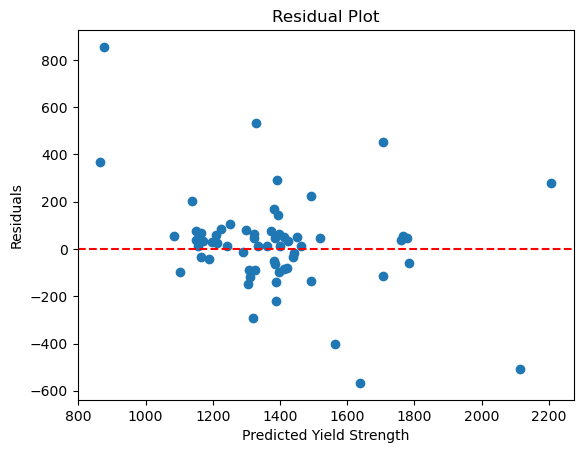

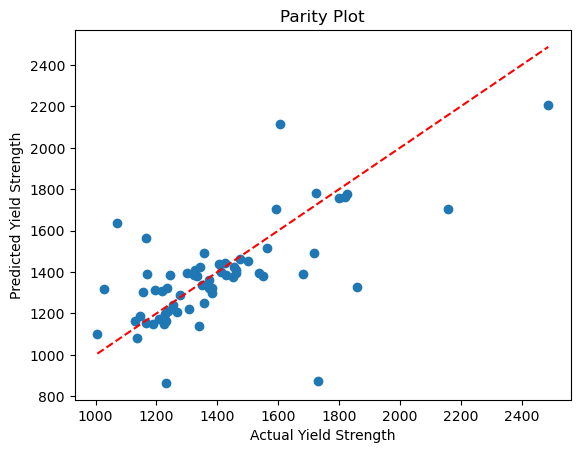

In [17]:
import matplotlib.pyplot as plt

# Calculate the residuals
residuals = y_oliynyk_test - y_oliynyk_pred

# Create the residual plot
plt.scatter(y_oliynyk_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Yield Strength')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Create the parity plot
plt.scatter(y_oliynyk_test, y_oliynyk_pred)
plt.plot([min(y_oliynyk_test), max(y_oliynyk_test)], [min(y_oliynyk_test), max(y_oliynyk_test)], color='r', linestyle='--')
plt.xlabel('Actual Yield Strength')
plt.ylabel('Predicted Yield Strength')
plt.title('Parity Plot')
plt.show()


f) Use your best model to predict the yield strength of a new steel composition Fe0.6Ni0.3Co0.2


In [24]:
# Featurize the new steel composition
data = {'formula': ['Fe0.6Ni0.3Co0.2'],
        'target': [1]} # Dummy target value

X_new = pd.DataFrame(data)
X_new_oliynyk, y_new_oliynyk, formulae, skipped = composition.generate_features(X_new, elem_prop='oliynyk')

# Predict the yield strength using the best model
yield_strength_pred = model_oliynyk.predict(X_new_oliynyk)

print("Predicted Yield Strength:", yield_strength_pred)


Processing Input Data: 100%|██████████| 1/1 [00:00<00:00, 1009.46it/s]


	Featurizing Compositions...


Assigning Features...: 100%|██████████| 1/1 [00:00<00:00, 663.66it/s]

	Creating Pandas Objects...
Predicted Yield Strength: [-1.56770958e+13]


g) Now it's time to think about the model you've built and tried using! Discuss why this dataset was appropriate or not for the task given. 

**<span style="color:teal">put your discussion here</span>**


**3.2 Classification**

Now let's try a classification task! 

a) Download the `matbench_expt_is_metal` dataset, featurize with your choice of feature set, and employ a logistic regression (linear classifier). Report metrics and performance. 

In [27]:
# Load the matbench_steels dataset
dataset = load_dataset("matbench_expt_is_metal")
df = pd.DataFrame(dataset)

# Display the dataset
print(df.head())  # Display the first few rows of the dataset
print(df.shape)  # Display the number of rows and columns in the dataset
print(df.info())  # Display information about the dataset, including data types and missing values
print(df.describe())  # Display summary statistics of the dataset

#featurize
df.rename(columns={'composition': 'formula', 'is_metal': 'target'}, inplace=True)
X_oliynyk, y_oliynyk, formulae, skipped = composition.generate_features(df, elem_prop='oliynyk')

# Split X_pliynyk into training and test sets
X_oliynyk_train, X_oliynyk_test, y_oliynyk_train, y_oliynyk_test = train_test_split(X_oliynyk, y_oliynyk, test_size=0.2, random_state=42)

         composition  is_metal
0           Ag(AuS)2      True
1         Ag(W3Br7)2      True
2   Ag0.5Ge1Pb1.75S4     False
3  Ag0.5Ge1Pb1.75Se4     False
4             Ag2BBr      True
(4921, 2)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4921 entries, 0 to 4920
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   composition  4921 non-null   object
 1   is_metal     4921 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 81.7+ KB
None
       composition is_metal
count         4921     4921
unique        4921        2
top       Ag(AuS)2    False
freq             1     2470


Processing Input Data:   0%|          | 0/4921 [00:00<?, ?it/s]

Processing Input Data: 100%|██████████| 4921/4921 [00:00<00:00, 9913.60it/s] 


	Featurizing Compositions...


Assigning Features...: 100%|██████████| 4921/4921 [00:01<00:00, 3915.80it/s]


	Creating Pandas Objects...


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_oliynyk_train, y_oliynyk_train)

# Predict the labels for the test data
y_pred = model.predict(X_oliynyk_test)

# Calculate the accuracy
accuracy = accuracy_score(y_oliynyk_test, y_pred)

# Calculate the precision
precision = precision_score(y_oliynyk_test, y_pred)

# Calculate the recall
recall = recall_score(y_oliynyk_test, y_pred)

# Calculate the F1 score
f1 = f1_score(y_oliynyk_test, y_pred)

# Report the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.8263959390862944
Precision: 0.7992047713717694
Recall: 0.8516949152542372
F1 Score: 0.8246153846153845


c:\Users\taylo\miniconda3\envs\MatInformatics\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
